In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Getting data


In [6]:


pcos_data =pd.read_csv("Data/pcos_cleaned.csv")
pcos_data


,Unnamed: 0,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,1,1,0,28,44.6,152.000,19.3,15,78,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,1,2,2,0,36,65.0,161.500,24.9,15,74,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,2,3,3,1,33,68.8,165.000,25.3,11,72,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,3,4,4,0,37,65.0,148.000,29.7,13,72,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,4,5,5,0,25,52.0,161.000,20.1,11,72,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,536,537,537,0,35,50.0,164.592,18.5,17,72,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,537,538,538,0,30,63.2,158.000,25.3,15,72,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,538,539,539,0,36,54.0,152.000,23.4,13,74,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,539,540,540,0,27,50.0,150.000,22.2,15,74,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


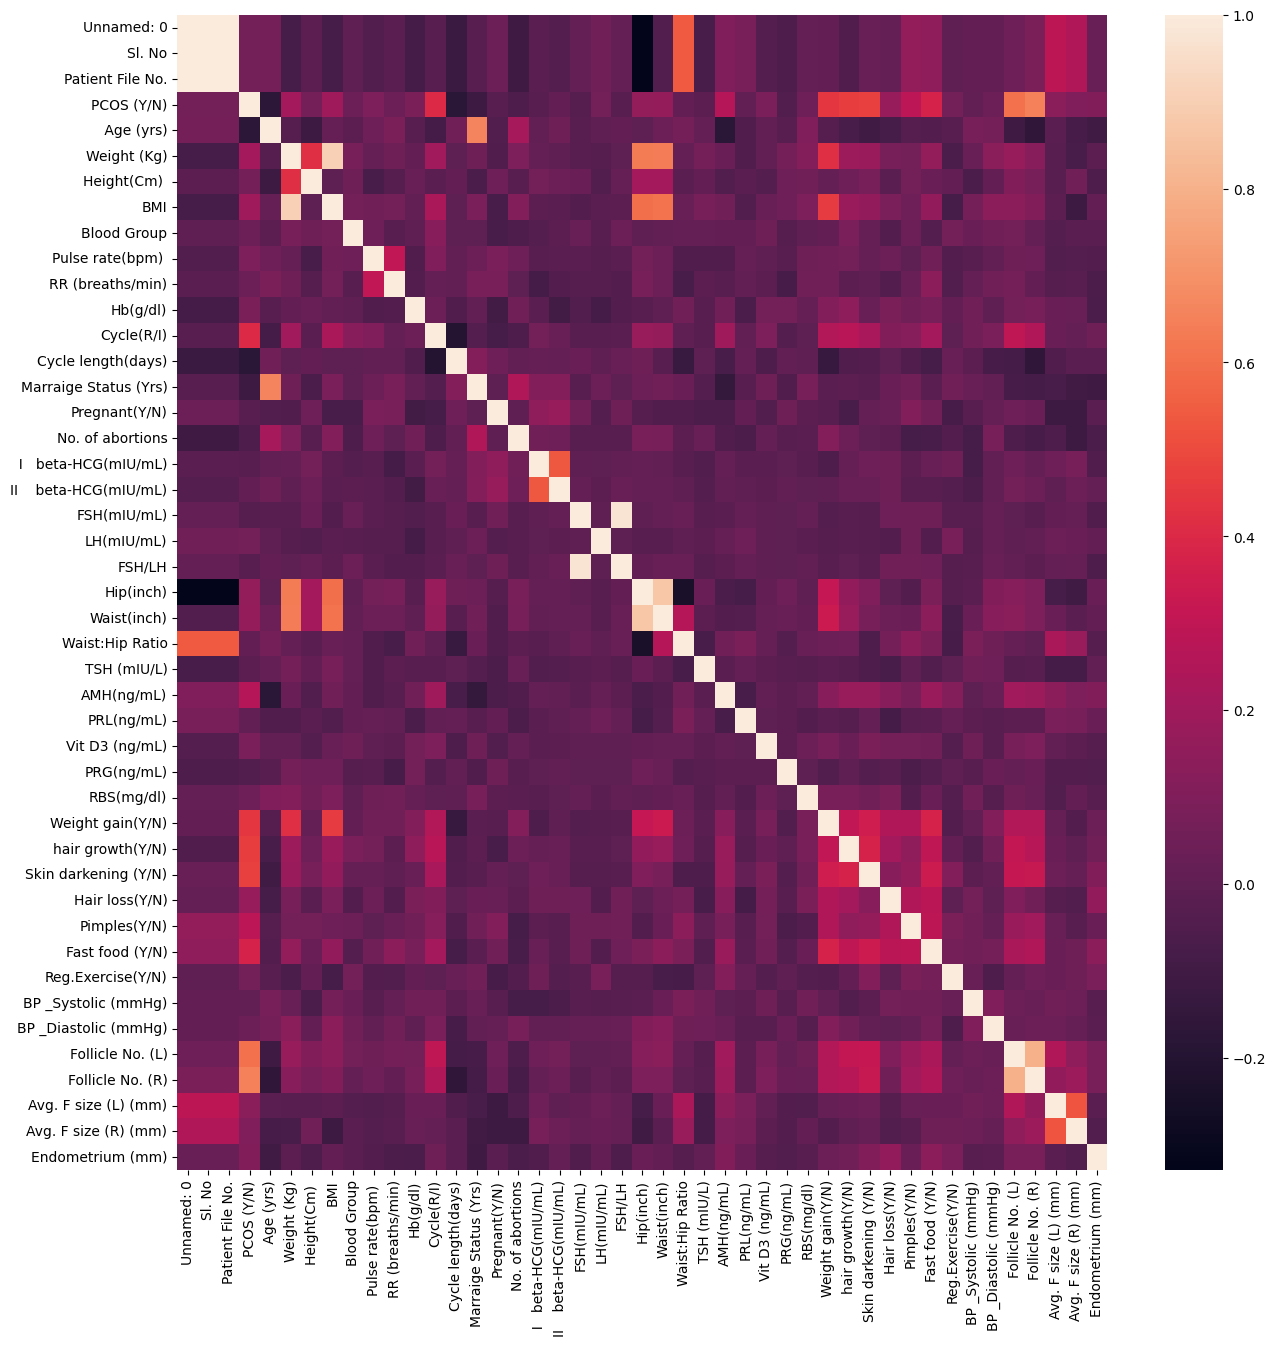

<Figure size 640x480 with 0 Axes>

In [7]:

plt.subplots(figsize=(15,15))
sns.heatmap(pcos_data.corr())
plt.show()
plt.savefig("corrmat.jpg")

In [8]:


pcos_data.corr()["PCOS (Y/N)"].sort_values(ascending=False)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.376183
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.264141
Weight (Kg)               0.211938
BMI                       0.199697
Hair loss(Y/N)            0.172879
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
Unnamed: 0                0.060998
Patient File No.          0.060998
Sl. No                    0.060998
RBS(mg/dl)                0.048922
BP _Diastolic (mmHg)

Pattern analysis with individual features



<Axes: xlabel='PCOS (Y/N)', ylabel='count'>

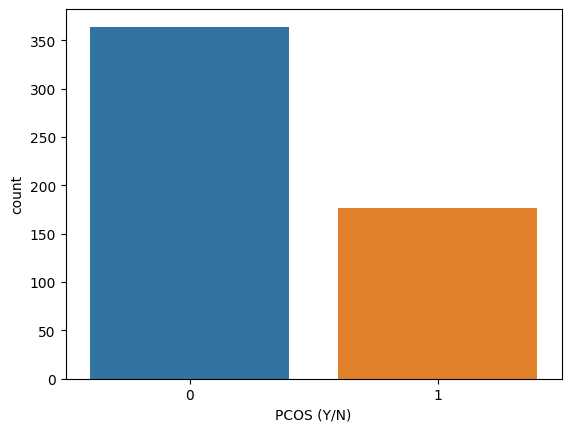

In [9]:
sns.countplot(x = 'PCOS (Y/N)',data = pcos_data)

In [10]:
#Statistical analysis of the features
for col in pcos_data.columns:
    print(pcos_data.groupby('PCOS (Y/N)').agg({col: ["max","mean", "median","min"]}))

           Unnamed: 0                       
                  max        mean median min
PCOS (Y/N)                                  
0                 539  263.357143  263.5   0
1                 540  283.661017  282.0   2
           Sl. No                       
              max        mean median min
PCOS (Y/N)                              
0             540  264.357143  264.5   1
1             541  284.661017  283.0   3
           Patient File No.                       
                        max        mean median min
PCOS (Y/N)                                        
0                       540  264.357143  264.5   1
1                       541  284.661017  283.0   3
           PCOS (Y/N)                
                  max mean median min
PCOS (Y/N)                           
0                   0  0.0    0.0   0
1                   1  1.0    1.0   1
            Age (yrs)                      
                  max       mean median min
PCOS (Y/N)                           

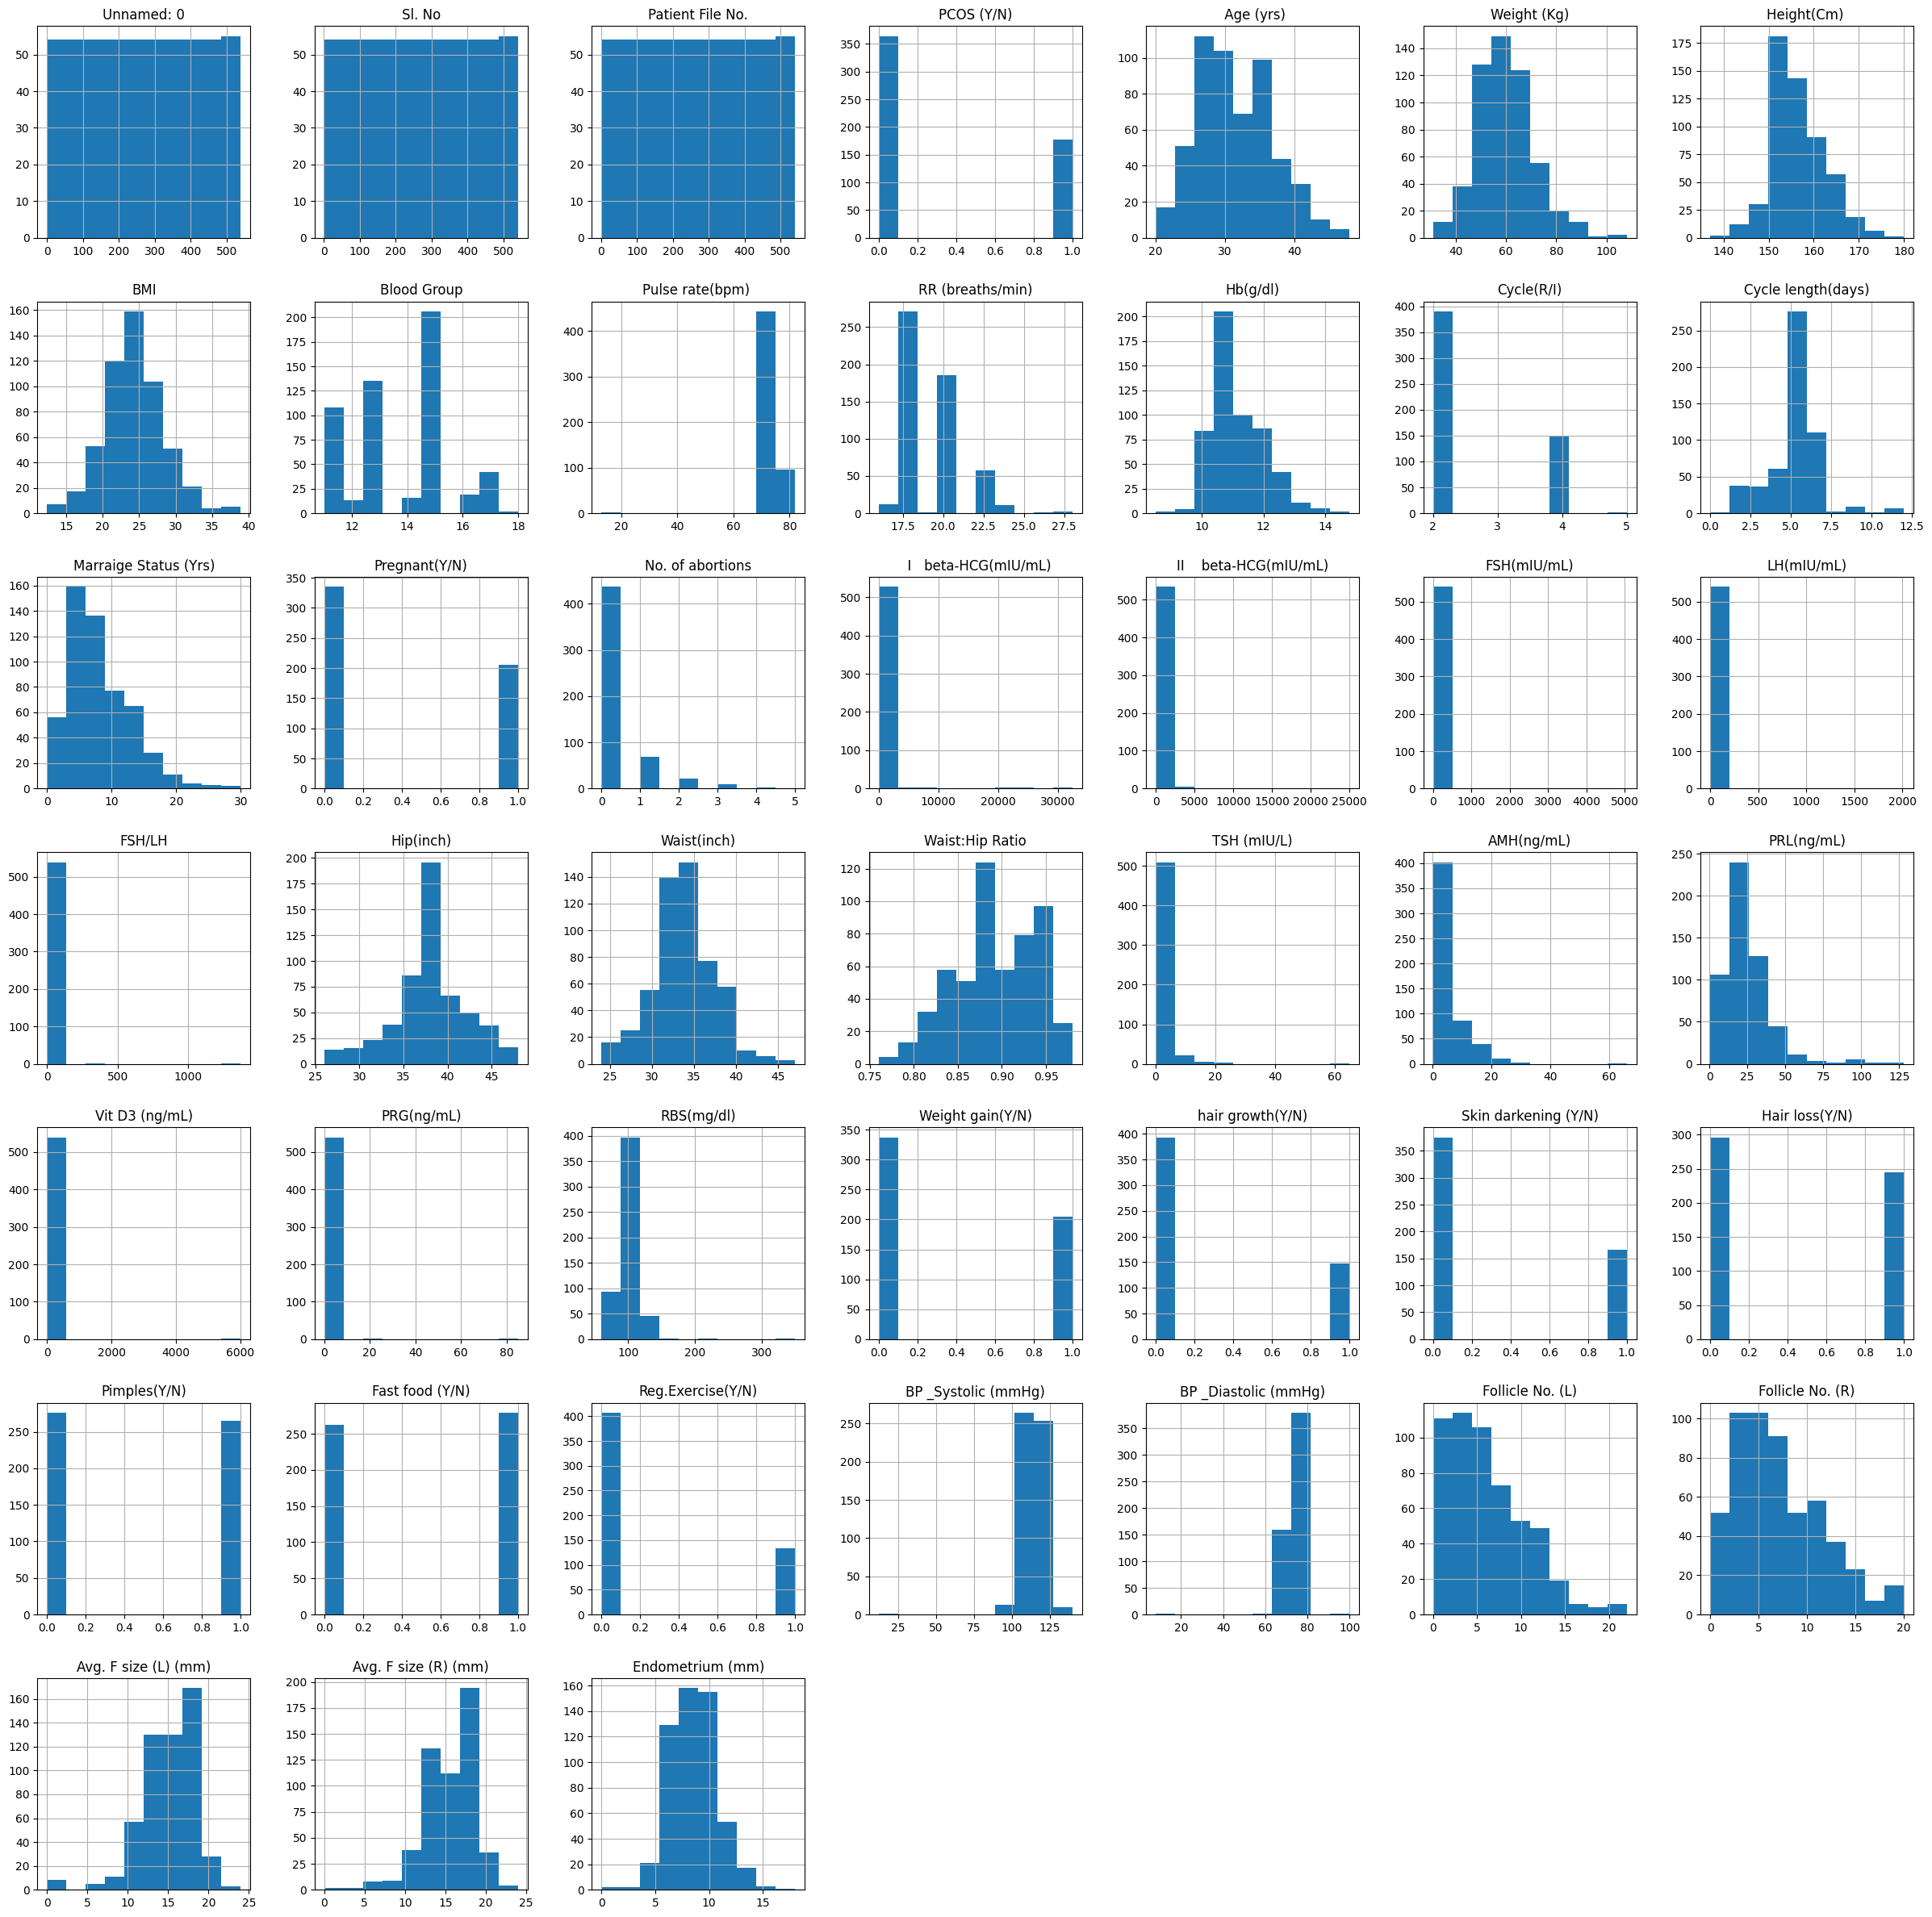

In [11]:
#Histogram Plot of all features
plt = pcos_data.hist(figsize = (30,30))

In [13]:
#Function to determine outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.05)
    quartile3 = dataframe[variable].quantile(0.95)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def outliers(dataframe, num_col_names, plot=False):
    variable_names = []
    for col in num_col_names:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, ":", number_of_outliers)
            
            
    return variable_names

In [14]:
outliers(pcos_data,pcos_data.columns).sort(reverse=True)

Pulse rate(bpm)  : 2
  I   beta-HCG(mIU/mL) : 14
II    beta-HCG(mIU/mL) : 7
FSH(mIU/mL) : 5
LH(mIU/mL) : 1
FSH/LH : 6
TSH (mIU/L) : 9
AMH(ng/mL) : 1
PRL(ng/mL) : 2
Vit D3 (ng/mL) : 2
PRG(ng/mL) : 5
RBS(mg/dl) : 2
BP _Systolic (mmHg) : 3
BP _Diastolic (mmHg) : 2


In [15]:
pcos_data.columns

Index(['Unnamed: 0', 'Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)',
       'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [16]:
list=["Pulse rate(bpm) ", "  I   beta-HCG(mIU/mL)","II    beta-HCG(mIU/mL)","FSH(mIU/mL)","LH(mIU/mL)","FSH/LH","TSH (mIU/L)","AMH(ng/mL)","PRL(ng/mL)","Vit D3 (ng/mL)","PRG(ng/mL)","RBS(mg/dl)","BP _Systolic (mmHg)","BP _Diastolic (mmHg)"]


number_of_columns = 2
number_of_rows = len(list)
plt.figure(figsize=(2*number_of_columns,10*number_of_rows))
for i in range(0,len(list)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.boxplot(pcos_data[list[i]],orient="h", palette="Set2")
    plt.tight_layout()
  

AttributeError: 'numpy.ndarray' object has no attribute 'figure'